# Titanic: Machine Learning from Disaster

### 1. import packages

In [34]:
import numpy as np
import pandas as pd
import matplotlib as plt
import string

# from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

from subprocess import check_output
print(check_output('ls').decode('utf8'))

cleantitanic2.py
gender_submission.csv
test.csv
titanic.ipynb
titanic_submission_forest.csv
titanic_submission_tree.csv
train.csv



### 2. read and analyze data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 3. Pre-Processing and feature engineering

In [7]:
# public function: to get substring
def substrings_in_string(string, substrings):
    for substring in substrings:
        if string.find(substring) != -1:
            return substring
    return np.nan

In [8]:
# statistics on Name column to get title
title_list = train['Name'].map(lambda x: x.split(",")[1].split(".")[0]).drop_duplicates()
print(type(title_list))
title_df = pd.DataFrame(title_list)
title_df.head(20)

<class 'pandas.core.series.Series'>


,Name
0,Mr
1,Mrs
2,Miss
7,Master
30,Don
149,Rev
245,Dr
369,Mme
443,Ms
449,Major


In [9]:
title_df['Title'] = title_df['Name']
title_df['Title_group'] = ['1','2','3','4','5','6','7',
                                '8','9','10','11','12','13',
                                '14','15','16','17']
del title_df['Name']
title_df.head(20)

,Title,Title_group
0,Mr,1
1,Mrs,2
2,Miss,3
7,Master,4
30,Don,5
149,Rev,6
245,Dr,7
369,Mme,8
443,Ms,9
449,Major,10


In [10]:
deck_list = [
    {'Deck': 'A', 'Deck_group': 1},
    {'Deck': 'B', 'Deck_group': 2},
    {'Deck': 'C', 'Deck_group': 3},
    {'Deck': 'D', 'Deck_group': 4},
    {'Deck': 'E', 'Deck_group': 5},
    {'Deck': 'F', 'Deck_group': 6},
    {'Deck': 'T', 'Deck_group': 7},
    {'Deck': 'G', 'Deck_group': 8},
    {'Deck': 'Unknown', 'Deck_group': 9},
]
deck_df = pd.DataFrame(deck_list)
deck_df

,Deck,Deck_group
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6
6,T,7
7,G,8
8,Unknown,9


In [11]:
embarked_list = [
    {'Embarked': 'C', 'embarked_no': 1},
    {'Embarked': 'Q', 'embarked_no': 2},
    {'Embarked': 'S', 'embarked_no': 3}
]
embarked_df = pd.DataFrame(embarked_list)
embarked_df

,Embarked,embarked_no
0,C,1
1,Q,2
2,S,3


In [12]:
def pre_processing(df):
    # age = 0 if NaN
    df['Age'] = df['Age'].fillna(0)
    
    # fare = 0 if NaN
    df['Fare'] = df['Fare'].fillna(0)
    
    # get title from name
    df['Title'] = df['Name'].map(lambda x:substrings_in_string(x, title_list))
    
    # calculate family size
    df['Family_size'] = df['SibSp'] + df['Parch']
    
    # calculate fare for per person
    df['Fare_per'] = df['Fare'] / (df['Family_size'] + 1)
    
    # deal with NaN in Fare(in test data, there is 1 nan value in Fare)
    # df['Fare'] = df['Fare'].map(lambda x: np.nan if x==0 else x)
    
    # Cabin NaN set as 'Unknown'
    df['Cabin'] = df['Cabin'].fillna('Unknown')
    
    # turning cabin number into Deck
    cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
    df['Deck'] = df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
    
    # age * class
    df['Age*class'] = df['Age'] * df['Pclass']
    
    # sex, male=0, female=1
    df['Sex'] = df['Sex'].map(lambda x: 0 if x=='male' else 1)

In [13]:
pre_processing(train)
# merge data into train dataframe
train = pd.merge(train, title_df, on='Title', how='inner')
train = pd.merge(train, deck_df, on='Deck', how='inner')
train = pd.merge(train, embarked_df, on='Embarked', how='inner')

In [14]:
pre_processing(test)
# merge data into test dataframe
test = pd.merge(test, title_df, on='Title', how='inner')
test = pd.merge(test, deck_df, on='Deck', how='inner')
test = pd.merge(test, embarked_df, on='Embarked', how='inner')

In [15]:
train = train.sort_values(by='PassengerId', ascending=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Fare_per,Deck,Age*class,Title_group,Deck_group,embarked_no
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,1,3.62500,Unknown,66.0,1,9,3
820,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mr,1,35.64165,C,38.0,1,3,1
397,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,0,7.92500,Unknown,78.0,3,9,3
515,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mr,1,26.55000,C,35.0,1,3,3
1,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,Mr,0,8.05000,Unknown,105.0,1,9,3


In [16]:
test = test.sort_values(by='PassengerId', ascending=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Fare_per,Deck,Age*class,Title_group,Deck_group,embarked_no
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Unknown,Q,Mr,0,7.829200,Unknown,103.5,1,9,2
46,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,Unknown,S,Mr,1,3.500000,Unknown,141.0,1,9,3
1,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Unknown,Q,Mr,0,9.687500,Unknown,124.0,1,9,2
47,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,Unknown,S,Mr,0,8.662500,Unknown,81.0,1,9,3
48,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,Unknown,S,Mr,2,4.095833,Unknown,66.0,1,9,3


In [17]:
# split train data for train and test
train_data, test_data = train_test_split(train, test_size = 0.3)

In [18]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_size',
       'Fare_per', 'Deck', 'Age*class', 'Title_group', 'Deck_group',
       'embarked_no'],
      dtype='object')

In [19]:
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp',
                 'Parch', 'Fare', 'Family_size','Fare_per', 
                 'Age*class', 'Title_group', 'Deck_group','embarked_no']
features = train_data[feature_names]
target = train_data['Survived']

In [20]:
features.head(20)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 608 to 686
Data columns (total 12 columns):
Pclass         622 non-null int64
Sex            622 non-null int64
Age            622 non-null float64
SibSp          622 non-null int64
Parch          622 non-null int64
Fare           622 non-null float64
Family_size    622 non-null int64
Fare_per       622 non-null float64
Age*class      622 non-null float64
Title_group    622 non-null object
Deck_group     622 non-null int64
embarked_no    622 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 63.2+ KB


### 4. Singal tree modle - Decision Tree

In [21]:
# use a decision tree model to predict
my_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
my_tree = my_tree.fit(features, target)

print("Score of tree on train data: ", my_tree.score(features, target))

Score of tree on train data:  0.940514469453


In [22]:
# evaluate on the test_data
test_features = test_data[feature_names]
test_data['eval_tree'] = my_tree.predict(test_features)
# Look at the RMSE score on the train data.
rmse_tree = np.sqrt(mean_squared_error(test_data['Survived'], test_data['eval_tree']))
print("RMSE:", rmse_tree)

RMSE: 0.441312309263


/Users/sharon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
test_features = test[feature_names]
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 368
Data columns (total 12 columns):
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Family_size    418 non-null int64
Fare_per       418 non-null float64
Age*class      418 non-null float64
Title_group    418 non-null object
Deck_group     418 non-null int64
embarked_no    418 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 42.5+ KB


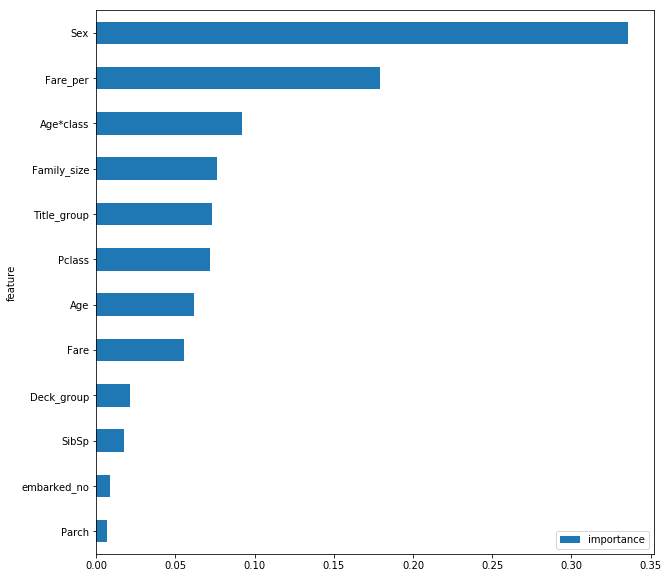

In [38]:
features_imp = pd.DataFrame()
features_imp['feature'] = feature_names
features_imp['importance'] = my_tree.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(10, 10))

In [24]:
def write_results(data, model_rel, file_name):
    """ Write results in the csv format for competition submission """
    with open(file_name,"w") as outfile:
        outfile.write("PassengerId,Survived\n")
        for passenger in data.index:
            line = str(data.at[passenger, "PassengerId"]) + "," + str(int(data.at[passenger, model_rel])) + "\n"
            outfile.write(line)

In [25]:
test["eval_tree"] = my_tree.predict(test[feature_names].values)
write_results(test, "eval_tree", "titanic_submission_tree.csv")

### 5. Random Forest

In [26]:
# The forest will have 50 trees 
# and the max number of features by trees is the square root of the total features number
my_forest = RandomForestClassifier(n_estimators=50, max_features='sqrt')
my_forest = my_forest.fit(features, target)

print("Score of forest on train data: ", my_forest.score(features, target))

Score of forest on train data:  0.985530546624


In [27]:
# evaluate on the test_data
test_features = test_data[feature_names]
test_data['eval_forest'] = my_forest.predict(test_features)
# Look at the RMSE score on the train data.
rmse_forest = np.sqrt(mean_squared_error(test_data['Survived'], test_data['eval_forest']))
print("RMSE:", rmse_forest)

RMSE: 0.419559247958


/Users/sharon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


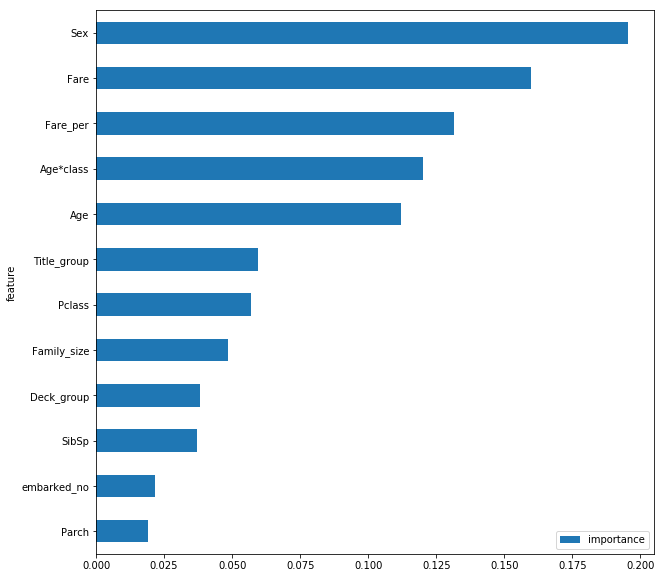

In [37]:
features_imp = pd.DataFrame()
features_imp['feature'] = feature_names
features_imp['importance'] = my_forest.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(10, 10))

In [28]:
test["eval_forest"] = my_forest.predict(test[feature_names].values)
write_results(test, "eval_forest", "titanic_submission_forest.csv")